# Q1. Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
toyo= pd.read_csv('ToyotaCorolla.csv', encoding= 'latin1')
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
toyota= toyo[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
toyota

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota[toyota.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
toyota_r= toyota.drop_duplicates().reset_index(drop= True)
toyota_r

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota1= toyota_r.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Analysis

In [ ]:
toyota1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


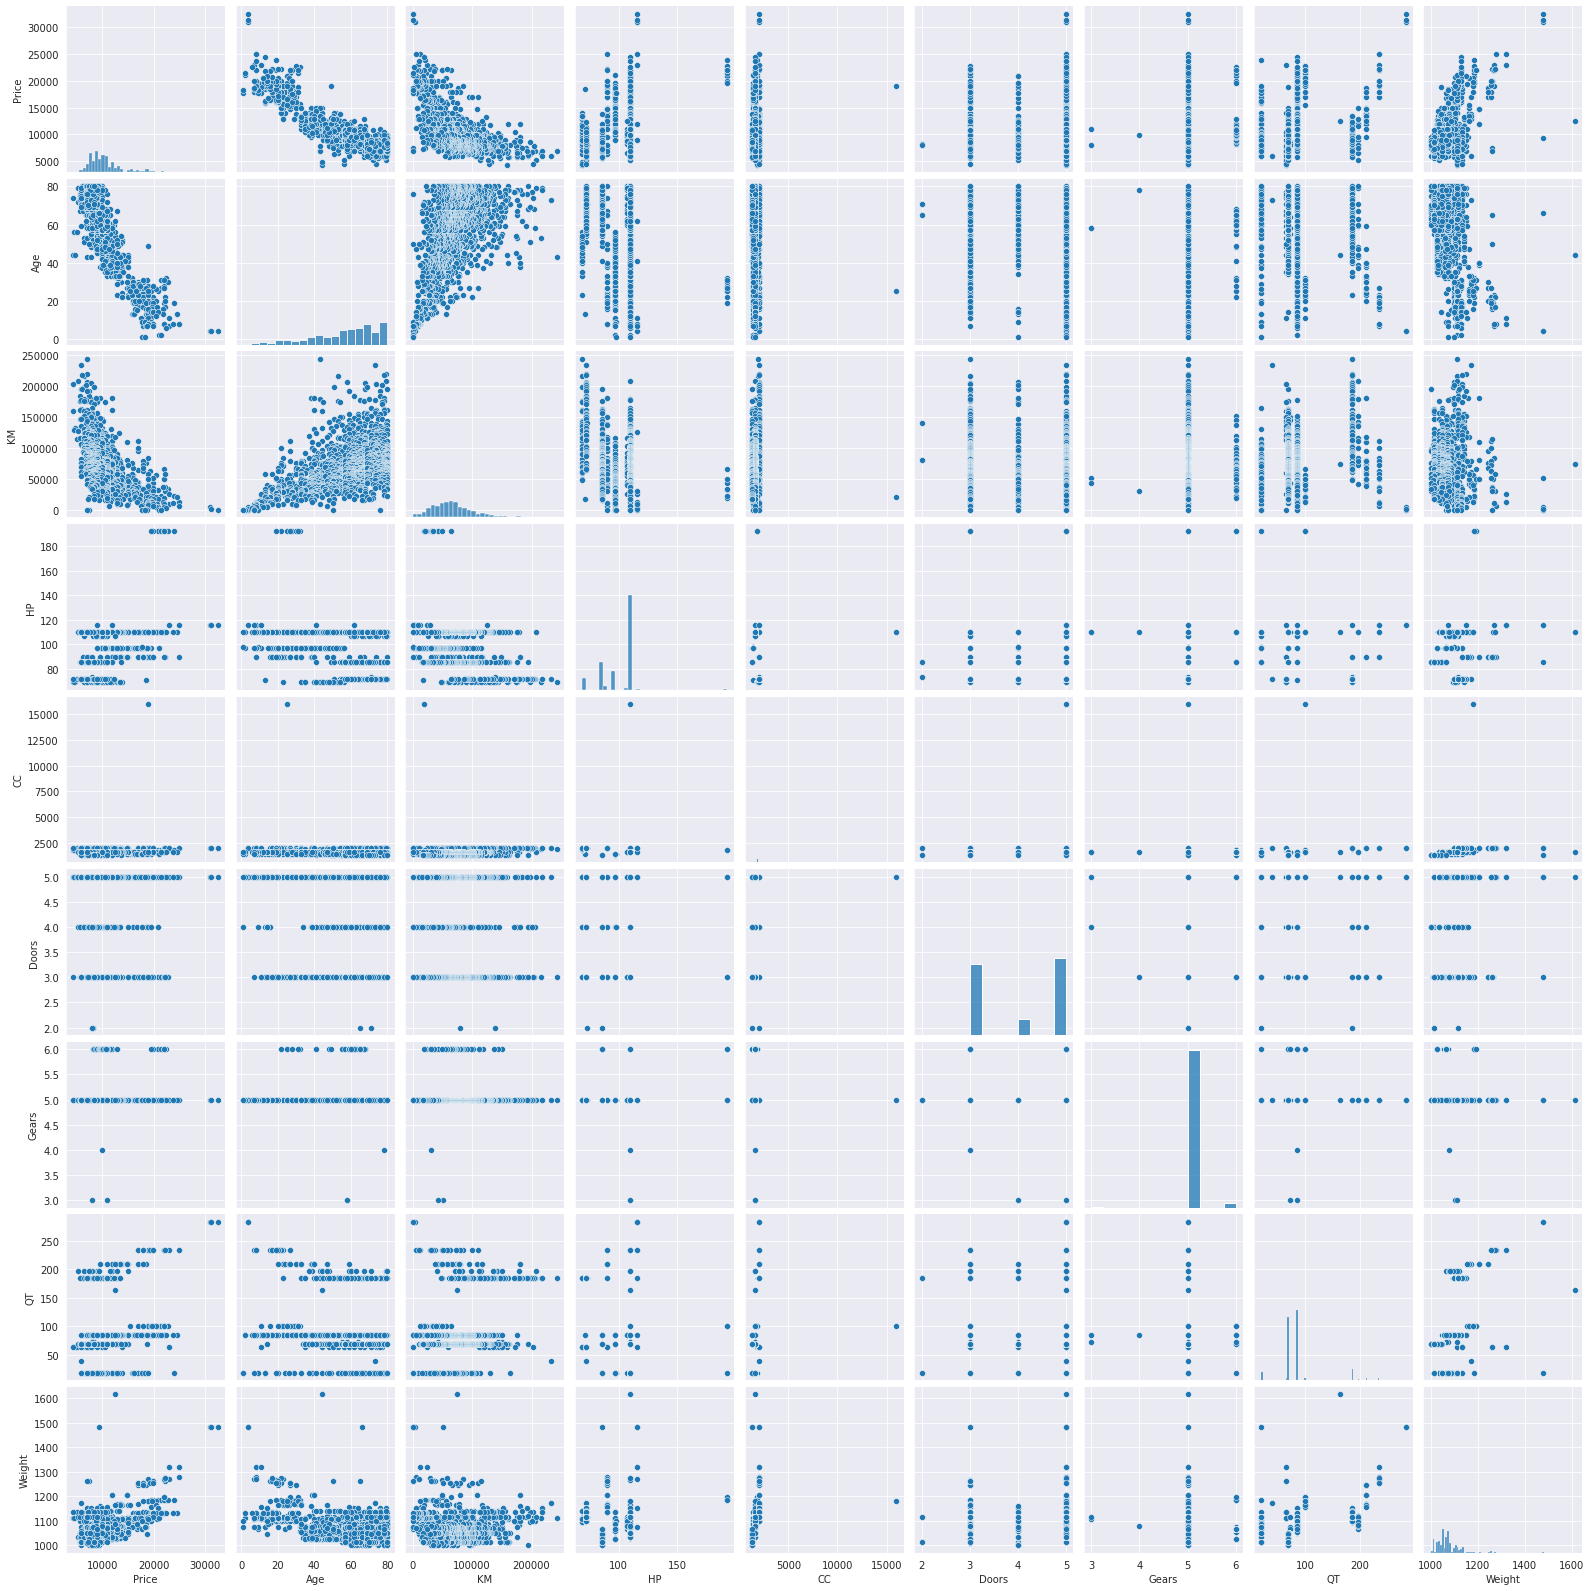

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota1)

# Model Building

In [ ]:
model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= toyota1).fit()

In [ ]:
model

# Model Testing

In [ ]:
# Finding Coefficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues, np.round(model.pvalues, 5)
# The numpy.round_() is a mathematical function that rounds an array to the given number of decimals.

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64, Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [ ]:
# Finding rsquared values
model.rsquared, model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [ ]:
# Build SLR & MLR models for insignificant variables 'cc' and 'Doors'
# Also find their tvalues and pvalues

In [ ]:
slr_c= smf.ols ('Price~CC', data= toyota1).fit()
slr_c.tvalues, slr_c.pvalues # cc has significant pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [ ]:
slr_d= smf.ols ('Price~Doors', data= toyota1).fit()
slr_d.tvalues, slr_d.pvalues # Doors has significant pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [ ]:
mlr_cd= smf.ols ('Price~CC+Doors', data= toyota1).fit()
mlr_cd.tvalues, mlr_cd.pvalues # cc & Doors has significant pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques
## Two Techniques: 1. Collinearity Check
## 2. Residual Analysis

In [ ]:
# 1. Collinearity problem Check
# Calculating VIF =1/(1-Rsquare) for all independent variables

rsq_Age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight', data= toyota1).fit().rsquared
vif_Age= 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight', data= toyota1).fit().rsquared
vif_KM= 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight', data= toyota1).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight', data= toyota1).fit().rsquared
vif_CC= 1/(1-rsq_CC)

rsq_Doors = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight', data= toyota1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight', data= toyota1).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)	

rsq_QT= smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight', data= toyota1).fit().rsquared
vif_QT = 1/(1-rsq_QT)	

rsq_Weight= smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT', data= toyota1).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)	

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [ ]:
# No variable has VIF>5, No Collinearity, so consider all variables in Regression equation

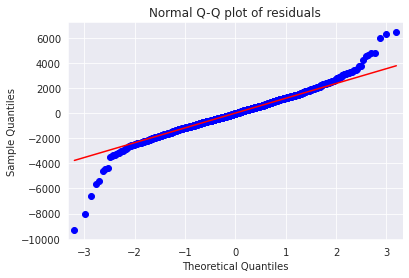

In [ ]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model(model.resid)
sm.qqplot(model.resid, line='q') # 'q' -A line is fit through the quartiles # line ='45'- to draw the 45-degree diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
list(np.where(model.resid>6000)) # outlier detection from above QQ plot of residuals 


[array([109, 146, 522])]

In [ ]:
list(np.where(model.resid<-6000)) # outlier detection from below QQ plot of residuals 

[array([220, 600, 959])]

In [ ]:
# Test of Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standard_values(vals) : return (vals-vals.mean())/vals.std() # User defined z= (x-mu)/sigma


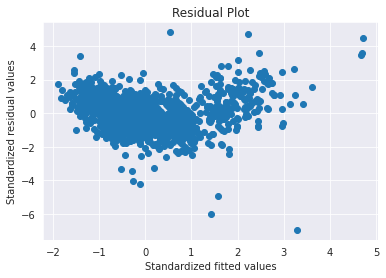

In [ ]:
plt.scatter(standard_values(model.fittedvalues), standard_values(model.resid))
plt.title('Residual Plot') # The plot is used to detect non-linearity, unequal error variances, and outliers.
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

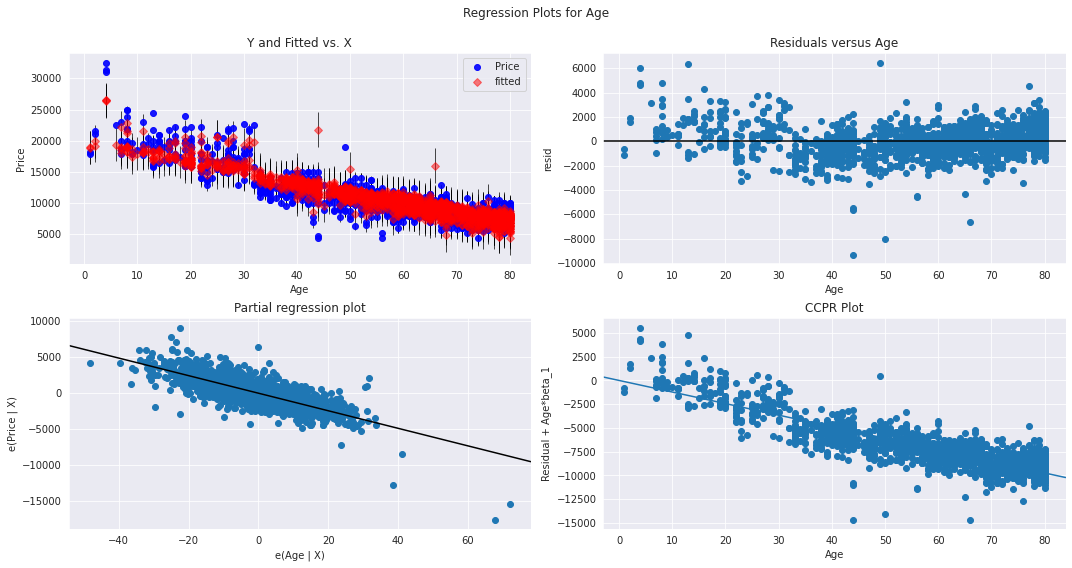

In [ ]:
fig= plt.figure(figsize =(15,8))
sm.graphics.plot_regress_exog(model,'Age', fig=fig)
plt.show()

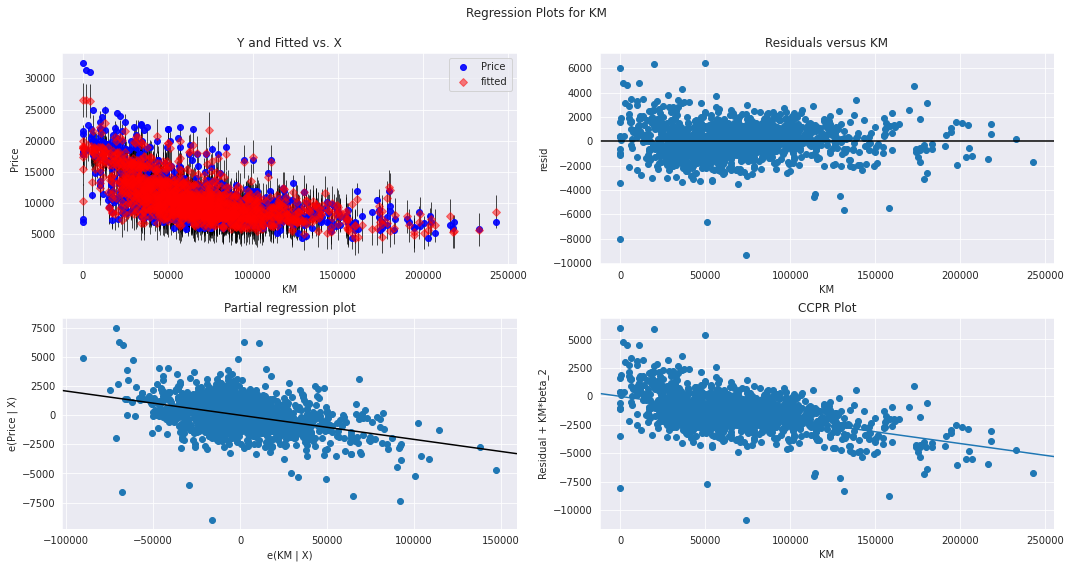

In [ ]:
fig= plt.figure(figsize= (15,8))
sm.graphics.plot_regress_exog(model,'KM',fig= fig)
plt.show()

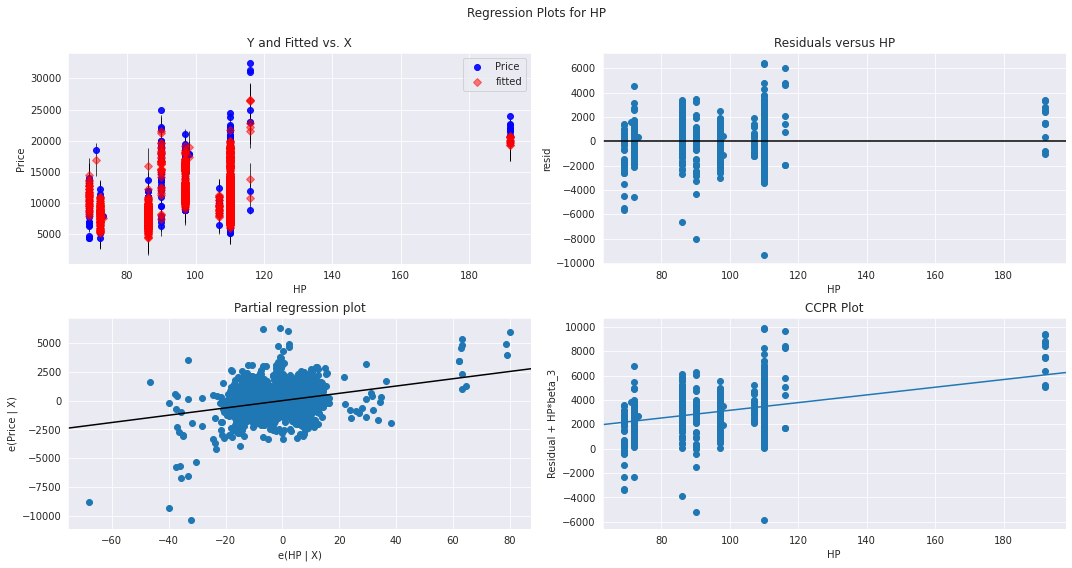

In [ ]:
fig= plt.figure(figsize= (15,8))
sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

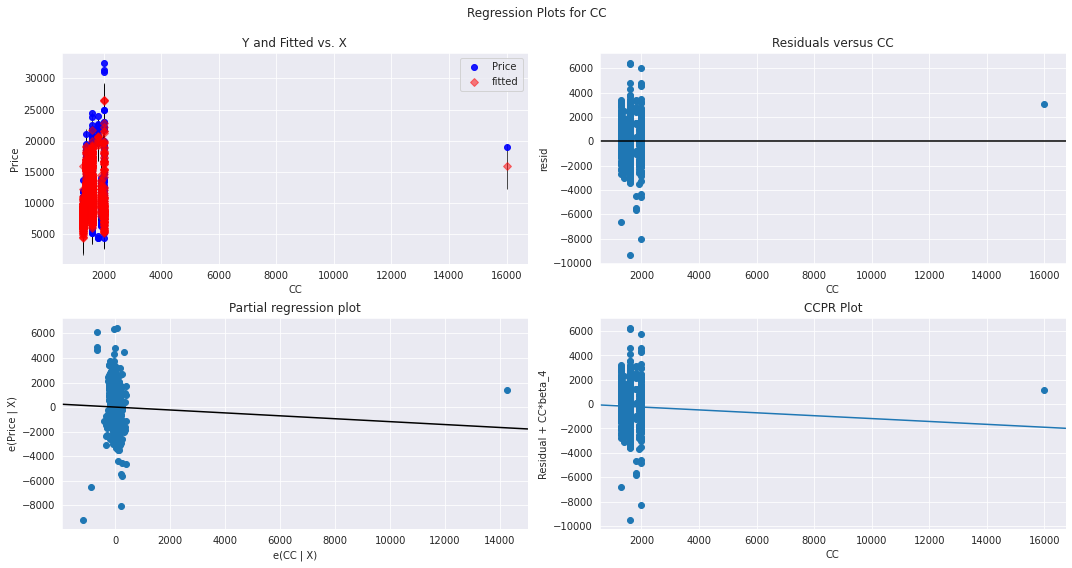

In [ ]:
fig= plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'CC', fig=fig)
plt.show()

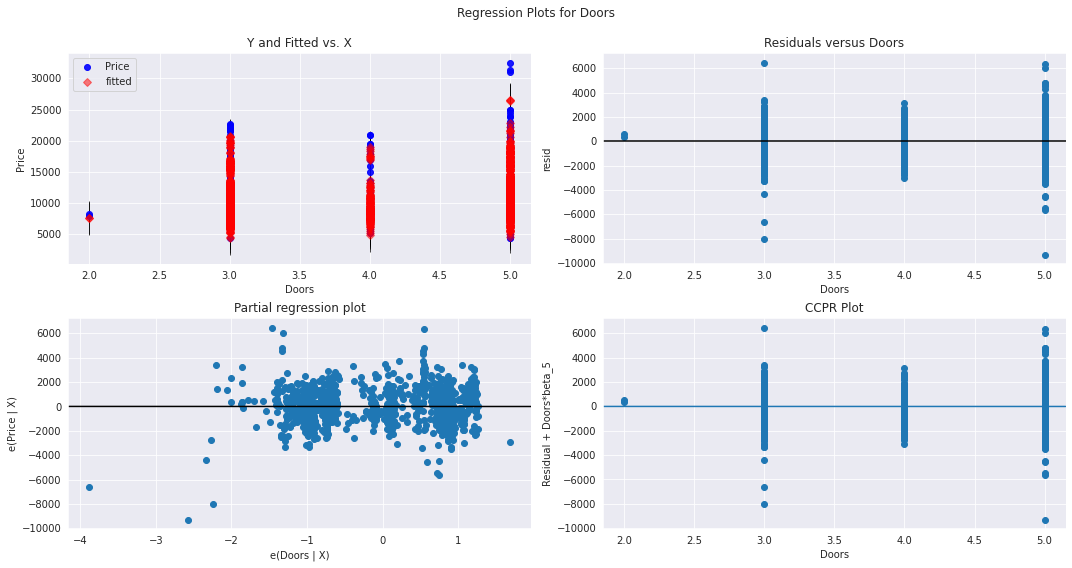

In [ ]:
fig= plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)
plt.show()

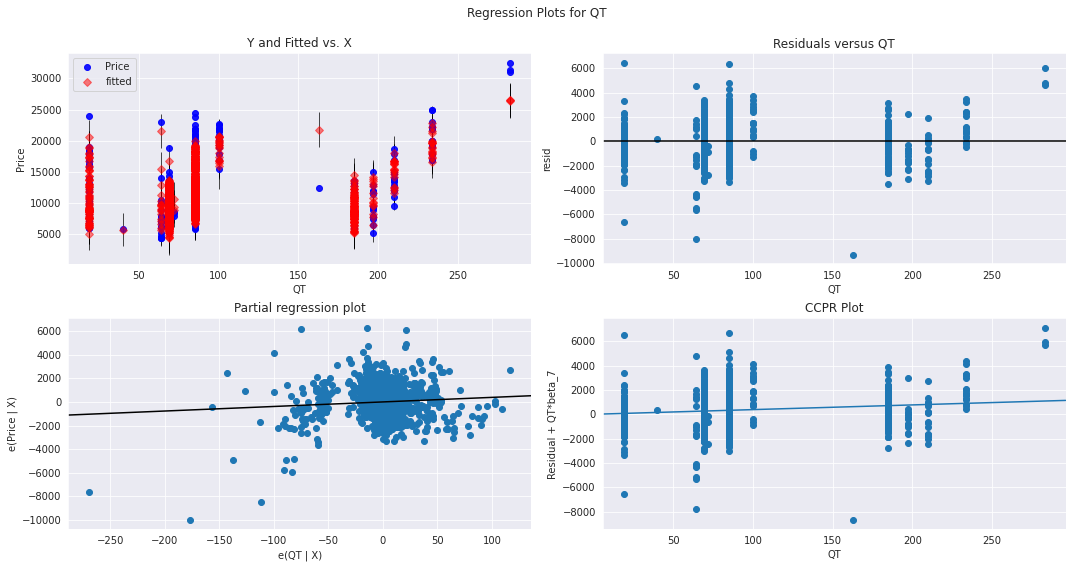

In [ ]:
fig= plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'QT', fig=fig)
plt.show()

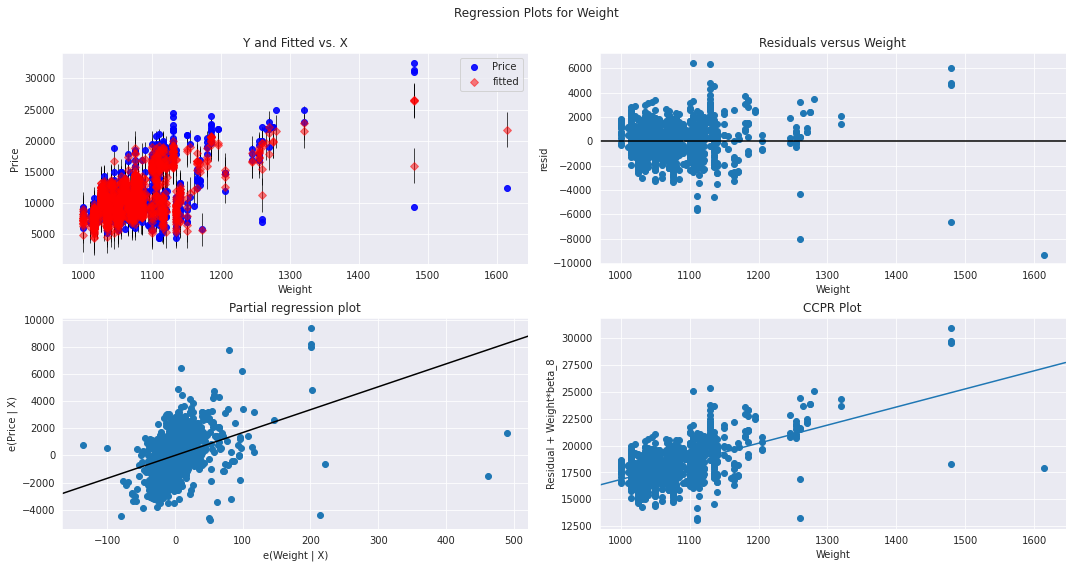

In [ ]:
fig= plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)
## Techniques:
### 1. Cook's Distance
### 2. Leverage value 

In [ ]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)= model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

<ipython-input-37-b0af527845e7>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(toyota1)), np.round(c,3))


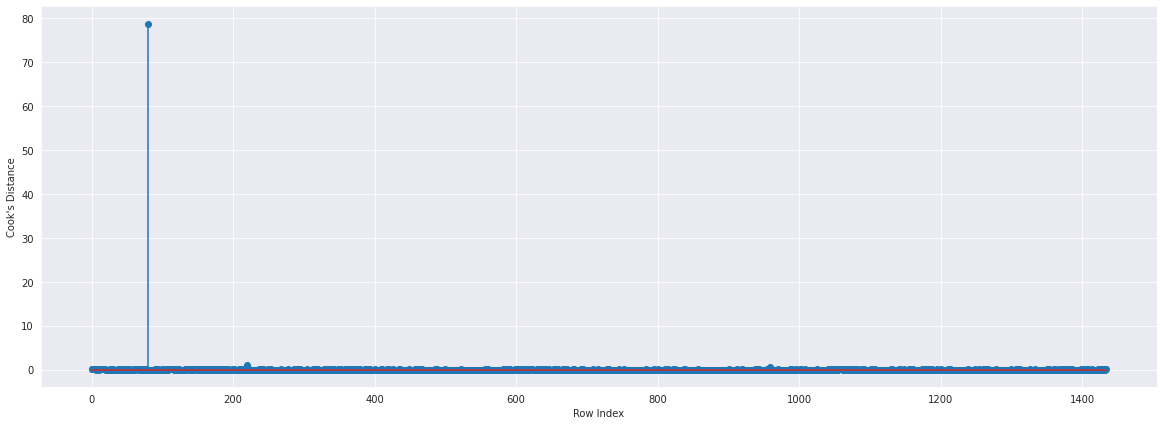

In [ ]:
# Plot the influencers using the stem plot
fig= plt.figure(figsize= (20,7))
plt.stem(np.arange(len(toyota1)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel("Cook's Distance")
plt.show();

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c), np.max(c)

(80, 78.72950582258927)

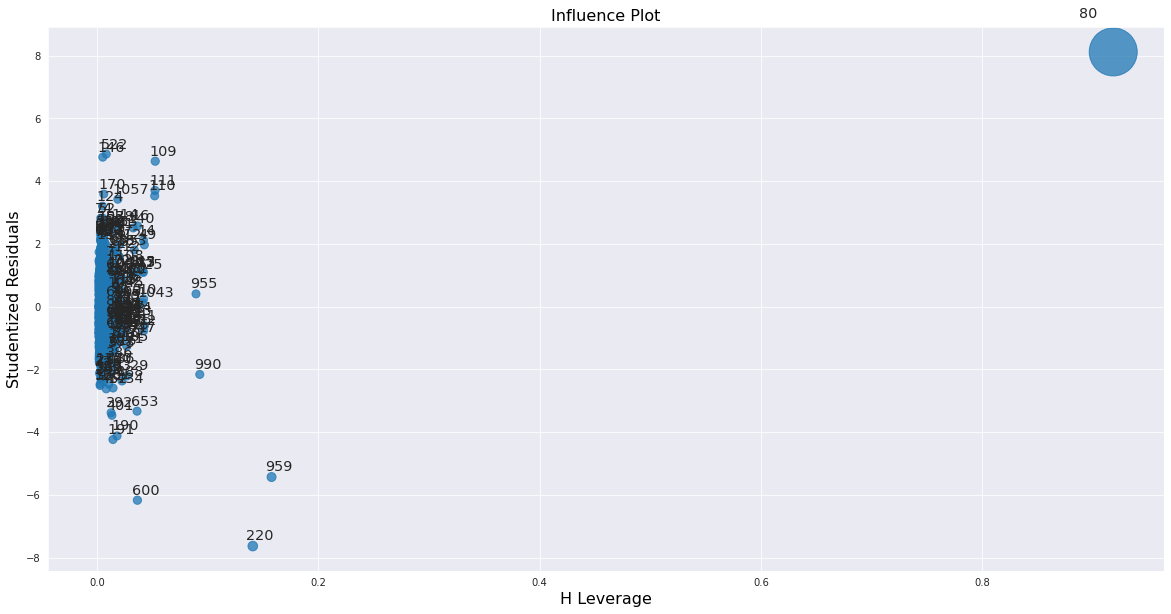

In [ ]:
# 2. Leverage Value using High Influence Point's : Points beyond Leverage_cutoff value are influencers
fig, ax= plt.subplots(figsize = (20,10))
fig= influence_plot(model, ax=ax)

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k= toyota1.shape[1]
n= toyota1.shape[0]
leverage_cutoff= (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [ ]:
toyota1[toyota1.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [ ]:
# Creating a copy of data so that original dataset is not affected
toyota_new= toyota1.copy()
toyota_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyota2= toyota_new.drop(toyota_new.index[[80]], axis= 0).reset_index(drop=True)
toyota2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [ ]:
while np.max(c)>0.5 :
  model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= toyota2).fit()
  (c,_)= model.get_influence().cooks_distance
  c
  np.argmax(c), np.max(c)
  toyota2= toyota2.drop(toyota2.index[[np.argmax(c)]], axis= 0).reset_index(drop=True)
  toyota2
else:
  final_model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= toyota2).fit()
  final_model.rsquared, final_model.aic
  print("Thus model accuracy is improved to", final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171205


In [ ]:
if np.max(c)>0.5:
  model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= toyota2).fit()
  (c,_)= model.get_influence().cooks_distance
  c
  np.argmax(c), np.max(c)
  toyota2= toyota2.drop(toyota2.index[[np.argmax(c)]], axis= 0).reset_index(drop=True)
  toyota2
elif np.max(c)<0.5:
  final_model= smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= toyota2).fit()
  final_model.rsquared, final_model.aic
  print("Thus model accuracy is improved to", final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171205


In [ ]:
final_model.rsquared

0.8882395145171205

# Model Predictions

In [ ]:
# say New data for prediction is 
new_data= pd.DataFrame({'Age': 12, 'KM':4000, "HP":110, 'CC':1250, 'Doors':4, 'Gears':5, 'QT':70, 'Weight':1500}, index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,4000,110,1250,4,5,70,1500


In [ ]:
# Manual Prediction of Price
final_model.predict(new_data)

0    31873.896253
dtype: float64

In [ ]:
# Automatic Prediction of Price with 90.02% accuracy
pred_y= final_model.predict(toyota2)
pred_y

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64